In [20]:
import os, sys
import numpy as np
import h5py
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
ds = []

with h5py.File('../features/surfacef.h5', 'r') as sf:
    for i, id in enumerate(sf['id']):
        ds.append([id, sf['surface'][i]])

with h5py.File('../features/sizef.h5', 'r') as sf:
    for row in ds:
        for i, id in enumerate(sf['id']):
            if row[0] == id:
                row.append(sf['size'][i])         

<AxesSubplot:xlabel='surface', ylabel='volume'>

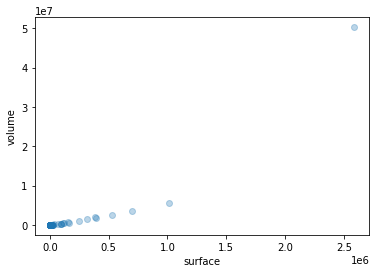

In [22]:
df = pd.DataFrame(ds, columns=['id', 'surface', 'volume'])
sns.regplot(x=df['surface'], y=df['volume'], scatter_kws={'alpha':0.3}, fit_reg=False)

In [23]:
df[df['volume'] >= 250000]

,id,surface,volume
1,10,5.313367e+05,2442114
102,11,1.569907e+05,665795
213,12,3.870367e+05,1958991
280,13,9.897116e+04,324071
292,140,9.221283e+04,352015
293,141,7.033340e+04,286664
295,143,1.183409e+05,416761
297,145,1.628892e+05,603617
298,146,9.117041e+04,354941
300,148,1.113049e+05,447178


<AxesSubplot:xlabel='surface', ylabel='volume'>

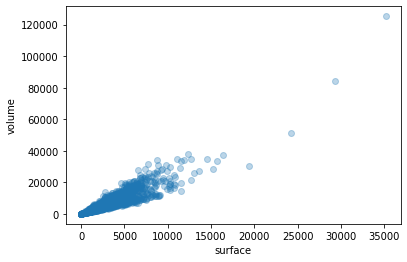

In [24]:
df = df[df['volume'] < 250000]
sns.regplot(x=df['surface'], y=df['volume'], scatter_kws={'alpha':0.3}, fit_reg=False)

[None, None]

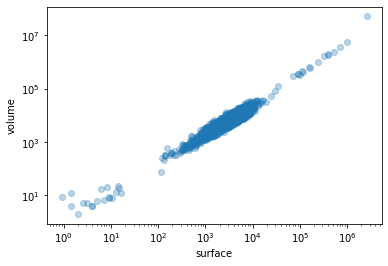

In [25]:
df = pd.DataFrame(ds, columns=['id', 'surface', 'volume'])
splot = sns.regplot(x=df['surface'], y=df['volume'], scatter_kws={'alpha':0.3}, fit_reg=False)
splot.set(xscale="log", yscale="log")